# <center> FRAUDE de carte 

# 1. Introduction

## 1.1 Librairies

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
from keras.layers import Dropout

<IPython.core.display.Javascript object>

## 1.2 Data

In [4]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['administratif',
 'ann',
 'BACAR_Maimouna_1_notebook_pretraitement_feature_extraction_faisaibilite_082023.ipynb',
 'CNN',
 'creditcard2023.csv',
 'dataset',
 'desktop.ini',
 'diamant',
 'dvdrental',
 'dvdrental.tar',
 'Face Mask Dataset',
 'Ma musique',
 'mariage',
 'Mes images',
 'Mes vidéos',
 'montre',
 'PRIX telephone',
 'projet 3',
 'projet 4',
 'RIZ',
 'spam',
 'sql learn.sql']

<IPython.core.display.Javascript object>

In [5]:
credit = pd.read_csv(path + "creditcard2023.csv")

<IPython.core.display.Javascript object>

In [6]:
credit.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


<IPython.core.display.Javascript object>

* **id :** Identifiant unique pour chaque transaction
* **V1-V28 :** fonctionnalités anonymisées représentant divers attributs de transaction (par exemple, heure, lieu, etc.)
* **Montant :** Le montant de la transaction
* **Classe :** Libellé binaire indiquant si la transaction est frauduleuse (1) ou non (0)

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

<IPython.core.display.Javascript object>

In [8]:
credit.shape

(568630, 31)

<IPython.core.display.Javascript object>

In [9]:
credit.iloc[:, 30:31]

,Class
0,0
1,0
2,0
3,0
4,0
...,...
568625,1
568626,1
568627,1
568628,1


<IPython.core.display.Javascript object>

In [10]:
# Distribution of the Target Column
credit["Class"].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

<IPython.core.display.Javascript object>

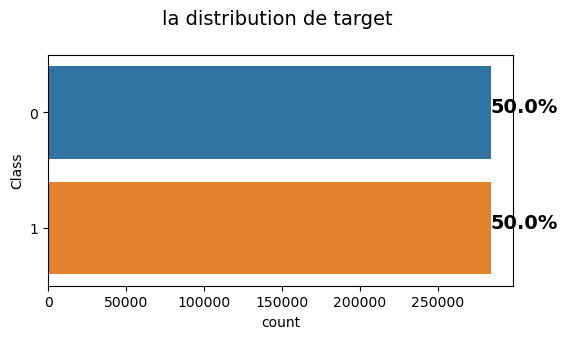

<IPython.core.display.Javascript object>

In [11]:
ax, fig = plt.subplots(figsize=(6, 3))
ax = sns.countplot(y="Class", data=credit)
ax.set_title("la distribution de target \n", fontsize=14)

for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_width() / len(credit.Class))
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), fontsize=14, fontweight="bold")

# 3. Preprocessing

In [12]:
X = credit.iloc[:, 1:30].values
y = credit.iloc[:, 30:31].values
print(len(y))
print(len(X))

568630
568630


<IPython.core.display.Javascript object>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<IPython.core.display.Javascript object>

# 4. ANN 1

In [15]:
ann = tf.keras.models.Sequential()

<IPython.core.display.Javascript object>

In [16]:
# 1ere couche
ann.add(
    tf.keras.layers.Dense(
        units=15, activation="relu", kernel_initializer="uniform", input_dim=29
    )
)
ann.add(tf.keras.layers.Dropout(rate=0.1))

<IPython.core.display.Javascript object>

In [17]:
# 2e couche
ann.add(
    tf.keras.layers.Dense(units=15, activation="relu", kernel_initializer="uniform")
)
ann.add(tf.keras.layers.Dropout(rate=0.1))

<IPython.core.display.Javascript object>

In [18]:
# 3e couche
ann.add(
    tf.keras.layers.Dense(units=15, activation="relu", kernel_initializer="uniform")
)
ann.add(tf.keras.layers.Dropout(rate=0.1))

<IPython.core.display.Javascript object>

In [19]:
# dernière couche
ann.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid", kernel_initializer="uniform")
)

<IPython.core.display.Javascript object>

In [20]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [22]:
ann.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
14216/14216 [==============================] - 39s 3ms/step - loss: 0.0259 - accuracy: 0.9915
Epoch 2/50
14216/14216 [==============================] - 37s 3ms/step - loss: 0.0253 - accuracy: 0.9914
Epoch 3/50
14216/14216 [==============================] - 38s 3ms/step - loss: 0.0250 - accuracy: 0.9917
Epoch 4/50
14216/14216 [==============================] - 39s 3ms/step - loss: 0.0253 - accuracy: 0.9918
Epoch 5/50
14216/14216 [==============================] - 41s 3ms/step - loss: 0.0248 - accuracy: 0.9919
Epoch 6/50
14216/14216 [==============================] - 40s 3ms/step - loss: 0.0248 - accuracy: 0.9916
Epoch 7/50
14216/14216 [==============================] - 39s 3ms/step - loss: 0.0248 - accuracy: 0.9916
Epoch 8/50
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0242 - accuracy: 0.9919
Epoch 9/50
14216/14216 [==============================] - 40s 3ms/step - loss: 0.0242 - accuracy: 0.9921
Epoch 10/50
14216/14216 [==============================

<IPython.core.display.Javascript object>

In [23]:
y_pred = ann.predict(X_test)

3554/3554 [==============================] - 6s 2ms/step


<IPython.core.display.Javascript object>

In [24]:
type(y_pred)

numpy.ndarray

<IPython.core.display.Javascript object>

In [25]:
len(y_pred)

113726

<IPython.core.display.Javascript object>

In [29]:
y_pred1 = y_pred > 0.5

<IPython.core.display.Javascript object>

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score


<IPython.core.display.Javascript object>

In [32]:
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[56483   267]
 [   35 56941]]


0.9973444946626101

<IPython.core.display.Javascript object>

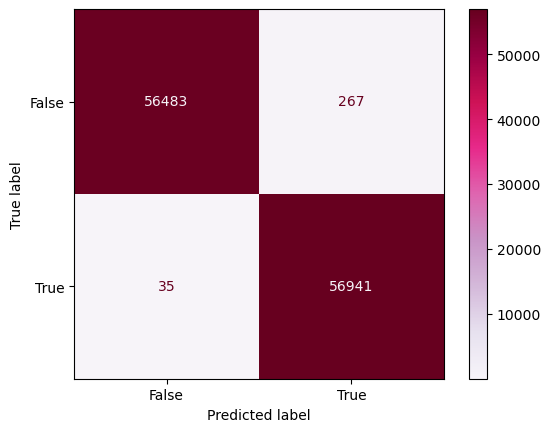

<IPython.core.display.Javascript object>

In [48]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True]
)

cm_display.plot(cmap=plt.cm.PuRd)
plt.show()

# 5. ANN 2 :GRIDSEARCH

On va essayer d'améliorer le model avec GridSearch

In [35]:
from sklearn.model_selection import cross_val_score, GridSearchCV

from scikeras.wrappers import KerasClassifier, KerasRegressor

<IPython.core.display.Javascript object>

In [36]:
def build_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(
        tf.keras.layers.Dense(
            units=15, activation="relu", kernel_initializer="uniform", input_dim=29
        )
    )
    ann.add(
        tf.keras.layers.Dense(units=15, activation="relu", kernel_initializer="uniform")
    )
    ann.add(
        tf.keras.layers.Dense(
            units=1, activation="sigmoid", kernel_initializer="uniform"
        )
    )
    ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return ann

<IPython.core.display.Javascript object>

In [37]:
ann2 = KerasClassifier(model=build_classifier)

<IPython.core.display.Javascript object>

In [38]:
batch_size = [25, 32]
epochs = [50, 100]

<IPython.core.display.Javascript object>

In [39]:
params = {
    "batch_size": batch_size,
    "epochs": epochs,
}

<IPython.core.display.Javascript object>

In [40]:
grid_model = GridSearchCV(estimator=ann2, param_grid=params, cv=5, scoring="accuracy")

<IPython.core.display.Javascript object>

In [41]:
grid_model = grid_model.fit(X_train, y_train)

Epoch 1/50
14557/14557 [==============================] - 33s 2ms/step - loss: 0.0664 - accuracy: 0.9750
Epoch 2/50
14557/14557 [==============================] - 29s 2ms/step - loss: 0.0239 - accuracy: 0.9920
Epoch 3/50
14557/14557 [==============================] - 29s 2ms/step - loss: 0.0170 - accuracy: 0.9946
Epoch 4/50
14557/14557 [==============================] - 29s 2ms/step - loss: 0.0135 - accuracy: 0.9958
Epoch 5/50
14557/14557 [==============================] - 29s 2ms/step - loss: 0.0115 - accuracy: 0.9964
Epoch 6/50
14557/14557 [==============================] - 30s 2ms/step - loss: 0.0102 - accuracy: 0.9969
Epoch 7/50
14557/14557 [==============================] - 31s 2ms/step - loss: 0.0093 - accuracy: 0.9973
Epoch 8/50
14557/14557 [==============================] - 31s 2ms/step - loss: 0.0088 - accuracy: 0.9975
Epoch 9/50
14557/14557 [==============================] - 30s 2ms/step - loss: 0.0082 - accuracy: 0.9976
Epoch 10/50
14557/14557 [==============================

14557/14557 [==============================] - 32s 2ms/step - loss: 0.0044 - accuracy: 0.9989
Epoch 28/50
14557/14557 [==============================] - 32s 2ms/step - loss: 0.0044 - accuracy: 0.9989
Epoch 29/50
14557/14557 [==============================] - 32s 2ms/step - loss: 0.0043 - accuracy: 0.9990
Epoch 30/50
14557/14557 [==============================] - 31s 2ms/step - loss: 0.0044 - accuracy: 0.9989
Epoch 31/50
14557/14557 [==============================] - 31s 2ms/step - loss: 0.0043 - accuracy: 0.9990
Epoch 32/50
14557/14557 [==============================] - 33s 2ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 33/50
14557/14557 [==============================] - 32s 2ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 34/50
14557/14557 [==============================] - 34s 2ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 35/50
14557/14557 [==============================] - 30s 2ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 36/50
14557/14557 [==============================] -

14557/14557 [==============================] - 52s 4ms/step - loss: 0.0123 - accuracy: 0.9963
Epoch 4/50
14557/14557 [==============================] - 53s 4ms/step - loss: 0.0104 - accuracy: 0.9970
Epoch 5/50
14557/14557 [==============================] - 64s 4ms/step - loss: 0.0094 - accuracy: 0.9973
Epoch 6/50
14557/14557 [==============================] - 53s 4ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 7/50
14557/14557 [==============================] - 53s 4ms/step - loss: 0.0078 - accuracy: 0.9978
Epoch 8/50
14557/14557 [==============================] - 54s 4ms/step - loss: 0.0069 - accuracy: 0.9981
Epoch 9/50
14557/14557 [==============================] - 57s 4ms/step - loss: 0.0064 - accuracy: 0.9982
Epoch 10/50
14557/14557 [==============================] - 58s 4ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 11/50
14557/14557 [==============================] - 54s 4ms/step - loss: 0.0053 - accuracy: 0.9985
Epoch 12/50
14557/14557 [==============================] - 53s 4

14557/14557 [==============================] - 67s 5ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 30/50
14557/14557 [==============================] - 70s 5ms/step - loss: 0.0044 - accuracy: 0.9989
Epoch 31/50
14557/14557 [==============================] - 62s 4ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 32/50
14557/14557 [==============================] - 66s 5ms/step - loss: 0.0043 - accuracy: 0.9989
Epoch 33/50
14557/14557 [==============================] - 62s 4ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 34/50
14557/14557 [==============================] - 63s 4ms/step - loss: 0.0043 - accuracy: 0.9989
Epoch 35/50
14557/14557 [==============================] - 78s 5ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 36/50
14557/14557 [==============================] - 63s 4ms/step - loss: 0.0040 - accuracy: 0.9990
Epoch 37/50
14557/14557 [==============================] - 68s 5ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 38/50
14557/14557 [==============================] -

14557/14557 [==============================] - 29s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 56/100
14557/14557 [==============================] - 30s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 57/100
14557/14557 [==============================] - 29s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 58/100
14557/14557 [==============================] - 29s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 59/100
14557/14557 [==============================] - 30s 2ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 60/100
14557/14557 [==============================] - 37s 3ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 61/100
14557/14557 [==============================] - 31s 2ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 62/100
14557/14557 [==============================] - 34s 2ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 63/100
14557/14557 [==============================] - 34s 2ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 64/100
14557/14557 [========================

14557/14557 [==============================] - 80s 5ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 32/100
14557/14557 [==============================] - 81s 6ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 33/100
14557/14557 [==============================] - 71s 5ms/step - loss: 0.0036 - accuracy: 0.9991
Epoch 34/100
14557/14557 [==============================] - 81s 6ms/step - loss: 0.0036 - accuracy: 0.9991
Epoch 35/100
14557/14557 [==============================] - 83s 6ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 36/100
14557/14557 [==============================] - 82s 6ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 37/100
14557/14557 [==============================] - 83s 6ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 38/100
14557/14557 [==============================] - 69s 5ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 39/100
14557/14557 [==============================] - 71s 5ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 40/100
14557/14557 [========================

14557/14557 [==============================] - 74s 5ms/step - loss: 0.0079 - accuracy: 0.9977
Epoch 8/100
14557/14557 [==============================] - 82s 6ms/step - loss: 0.0072 - accuracy: 0.9980
Epoch 9/100
14557/14557 [==============================] - 72s 5ms/step - loss: 0.0067 - accuracy: 0.9981
Epoch 10/100
14557/14557 [==============================] - 79s 5ms/step - loss: 0.0065 - accuracy: 0.9983
Epoch 11/100
14557/14557 [==============================] - 81s 6ms/step - loss: 0.0060 - accuracy: 0.9984
Epoch 12/100
14557/14557 [==============================] - 75s 5ms/step - loss: 0.0057 - accuracy: 0.9985
Epoch 13/100
14557/14557 [==============================] - 73s 5ms/step - loss: 0.0053 - accuracy: 0.9986
Epoch 14/100
14557/14557 [==============================] - 66s 5ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 15/100
14557/14557 [==============================] - 80s 5ms/step - loss: 0.0051 - accuracy: 0.9987
Epoch 16/100
14557/14557 [==========================

14557/14557 [==============================] - 24s 2ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 84/100
14557/14557 [==============================] - 25s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 85/100
14557/14557 [==============================] - 25s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 86/100
14557/14557 [==============================] - 26s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 87/100
14557/14557 [==============================] - 25s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 88/100
14557/14557 [==============================] - 30s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 89/100
14557/14557 [==============================] - 26s 2ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 90/100
14557/14557 [==============================] - 25s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 91/100
14557/14557 [==============================] - 26s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 92/100
14557/14557 [========================

14557/14557 [==============================] - 23s 2ms/step - loss: 0.0054 - accuracy: 0.9985
Epoch 60/100
14557/14557 [==============================] - 23s 2ms/step - loss: 0.0057 - accuracy: 0.9984
Epoch 61/100
14557/14557 [==============================] - 23s 2ms/step - loss: 0.0055 - accuracy: 0.9986
Epoch 62/100
14557/14557 [==============================] - 23s 2ms/step - loss: 0.0054 - accuracy: 0.9986
Epoch 63/100
14557/14557 [==============================] - 23s 2ms/step - loss: 0.0053 - accuracy: 0.9986
Epoch 64/100
14557/14557 [==============================] - 23s 2ms/step - loss: 0.0053 - accuracy: 0.9985
Epoch 65/100
14557/14557 [==============================] - 23s 2ms/step - loss: 0.0053 - accuracy: 0.9986
Epoch 66/100
14557/14557 [==============================] - 24s 2ms/step - loss: 0.0053 - accuracy: 0.9986
Epoch 67/100
14557/14557 [==============================] - 24s 2ms/step - loss: 0.0053 - accuracy: 0.9985
Epoch 68/100
14557/14557 [========================

14557/14557 [==============================] - 31s 2ms/step - loss: 0.0043 - accuracy: 0.9989
Epoch 36/100
14557/14557 [==============================] - 26s 2ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 37/100
14557/14557 [==============================] - 28s 2ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 38/100
14557/14557 [==============================] - 25s 2ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 39/100
14557/14557 [==============================] - 25s 2ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 40/100
14557/14557 [==============================] - 24s 2ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 41/100
14557/14557 [==============================] - 24s 2ms/step - loss: 0.0040 - accuracy: 0.9990
Epoch 42/100
14557/14557 [==============================] - 24s 2ms/step - loss: 0.0039 - accuracy: 0.9991
Epoch 43/100
14557/14557 [==============================] - 24s 2ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 44/100
14557/14557 [========================

11373/11373 [==============================] - 19s 2ms/step - loss: 0.0081 - accuracy: 0.9978
Epoch 12/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0078 - accuracy: 0.9978
Epoch 13/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0074 - accuracy: 0.9980
Epoch 14/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0071 - accuracy: 0.9980
Epoch 15/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0070 - accuracy: 0.9982
Epoch 16/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0067 - accuracy: 0.9982
Epoch 17/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0064 - accuracy: 0.9983
Epoch 18/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0062 - accuracy: 0.9983
Epoch 19/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0059 - accuracy: 0.9985
Epoch 20/50
11373/11373 [==============================] -

11373/11373 [==============================] - 20s 2ms/step - loss: 0.0043 - accuracy: 0.9990
Epoch 38/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0041 - accuracy: 0.9991
Epoch 39/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0041 - accuracy: 0.9991
Epoch 40/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 41/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0042 - accuracy: 0.9990
Epoch 42/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0041 - accuracy: 0.9991
Epoch 43/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0040 - accuracy: 0.9990
Epoch 44/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 45/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0040 - accuracy: 0.9990
Epoch 46/50
11373/11373 [==============================] -

11373/11373 [==============================] - 19s 2ms/step - loss: 0.0095 - accuracy: 0.9973
Epoch 14/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0090 - accuracy: 0.9975
Epoch 15/50
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 16/50
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0083 - accuracy: 0.9977
Epoch 17/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0081 - accuracy: 0.9977
Epoch 18/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 19/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0072 - accuracy: 0.9981
Epoch 20/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0071 - accuracy: 0.9980
Epoch 21/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0069 - accuracy: 0.9981
Epoch 22/50
11373/11373 [==============================] -

11373/11373 [==============================] - 19s 2ms/step - loss: 0.0128 - accuracy: 0.9961
Epoch 40/50
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0124 - accuracy: 0.9961
Epoch 41/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0120 - accuracy: 0.9963
Epoch 42/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0118 - accuracy: 0.9964
Epoch 43/50
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 44/50
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0114 - accuracy: 0.9965
Epoch 45/50
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0115 - accuracy: 0.9964
Epoch 46/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0109 - accuracy: 0.9966
Epoch 47/50
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0109 - accuracy: 0.9967
Epoch 48/50
11373/11373 [==============================] -

11373/11373 [==============================] - 18s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 66/100
11373/11373 [==============================] - 17s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 67/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 68/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 69/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 70/100
11373/11373 [==============================] - 39s 3ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 71/100
11373/11373 [==============================] - 48s 4ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 72/100
11373/11373 [==============================] - 45s 4ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 73/100
11373/11373 [==============================] - 50s 4ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 74/100
11373/11373 [========================

11373/11373 [==============================] - 69s 6ms/step - loss: 0.0061 - accuracy: 0.9983
Epoch 42/100
11373/11373 [==============================] - 68s 6ms/step - loss: 0.0059 - accuracy: 0.9983
Epoch 43/100
11373/11373 [==============================] - 67s 6ms/step - loss: 0.0060 - accuracy: 0.9982
Epoch 44/100
11373/11373 [==============================] - 71s 6ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 45/100
11373/11373 [==============================] - 50s 4ms/step - loss: 0.0058 - accuracy: 0.9983
Epoch 46/100
11373/11373 [==============================] - 51s 5ms/step - loss: 0.0057 - accuracy: 0.9984
Epoch 47/100
11373/11373 [==============================] - 63s 6ms/step - loss: 0.0057 - accuracy: 0.9984
Epoch 48/100
11373/11373 [==============================] - 61s 5ms/step - loss: 0.0055 - accuracy: 0.9984
Epoch 49/100
11373/11373 [==============================] - 61s 5ms/step - loss: 0.0054 - accuracy: 0.9985
Epoch 50/100
11373/11373 [========================

11373/11373 [==============================] - 21s 2ms/step - loss: 0.0065 - accuracy: 0.9983
Epoch 18/100
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0064 - accuracy: 0.9983
Epoch 19/100
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 20/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0059 - accuracy: 0.9985
Epoch 21/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0060 - accuracy: 0.9985
Epoch 22/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0058 - accuracy: 0.9986
Epoch 23/100
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0058 - accuracy: 0.9985
Epoch 24/100
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0056 - accuracy: 0.9985
Epoch 25/100
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0053 - accuracy: 0.9987
Epoch 26/100
11373/11373 [========================

11373/11373 [==============================] - 17s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 94/100
11373/11373 [==============================] - 24s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 95/100
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 96/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 97/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 98/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 99/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 100/100
2844/2844 [==============================] - 10s 1ms/step
Epoch 1/100
11373/11373 [==============================] - 29s 2ms/step - loss: 0.0644 - accuracy: 0.9758
Epoch 2/100
11373/11373 [==============================] - 32s 3ms/step - loss: 0.0212

11373/11373 [==============================] - 33s 3ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 70/100
11373/11373 [==============================] - 32s 3ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 71/100
11373/11373 [==============================] - 35s 3ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 72/100
11373/11373 [==============================] - 36s 3ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 73/100
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 74/100
11373/11373 [==============================] - 33s 3ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 75/100
11373/11373 [==============================] - 33s 3ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 76/100
11373/11373 [==============================] - 31s 3ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 77/100
11373/11373 [==============================] - 33s 3ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 78/100
11373/11373 [========================

11373/11373 [==============================] - 18s 2ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 46/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 47/100
11373/11373 [==============================] - 20s 2ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 48/100
11373/11373 [==============================] - 22s 2ms/step - loss: 0.0047 - accuracy: 0.9987
Epoch 49/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 50/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 51/100
11373/11373 [==============================] - 18s 2ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 52/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 53/100
11373/11373 [==============================] - 19s 2ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 54/100
11373/11373 [========================

18197/18197 [==============================] - 30s 2ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 22/100
18197/18197 [==============================] - 28s 2ms/step - loss: 0.0044 - accuracy: 0.9988
Epoch 23/100
18197/18197 [==============================] - 28s 2ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 24/100
18197/18197 [==============================] - 29s 2ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 25/100
18197/18197 [==============================] - 28s 2ms/step - loss: 0.0040 - accuracy: 0.9990
Epoch 26/100
18197/18197 [==============================] - 28s 2ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 27/100
18197/18197 [==============================] - 28s 2ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 28/100
18197/18197 [==============================] - 28s 2ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 29/100
18197/18197 [==============================] - 28s 2ms/step - loss: 0.0036 - accuracy: 0.9991
Epoch 30/100
18197/18197 [========================

18197/18197 [==============================] - 88s 5ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 98/100
18197/18197 [==============================] - 106s 6ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 99/100
18197/18197 [==============================] - 109s 6ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 100/100
18197/18197 [==============================] - 102s 6ms/step - loss: 0.0019 - accuracy: 0.9995


<IPython.core.display.Javascript object>

In [50]:
best_param = grid_model.best_params_
best_model = grid_model.best_estimator_
print(best_param)
print(best_model)

{'batch_size': 25, 'epochs': 100}
KerasClassifier(
	model=<function build_classifier at 0x000002730FED3C40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=25
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)


<IPython.core.display.Javascript object>

In [45]:
y_pred2 = best_model.predict(X_test)

4550/4550 [==============================] - 13s 1ms/step


<IPython.core.display.Javascript object>

In [46]:
y_predict2 = y_pred2 > 0.5
y_predict2

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

<IPython.core.display.Javascript object>

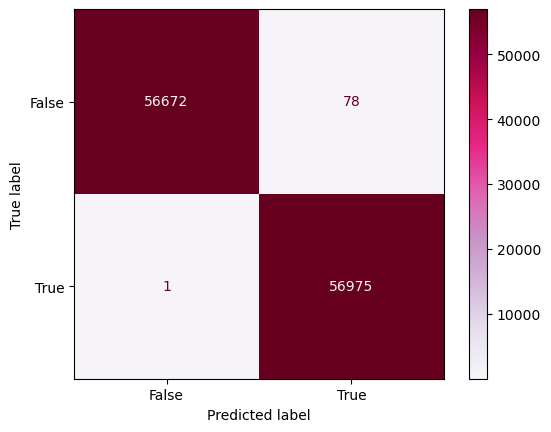

<IPython.core.display.Javascript object>

In [47]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predict2)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True]
)

cm_display.plot(cmap=plt.cm.PuRd)
plt.show()

In [51]:
print(accuracy_score(y_test, y_predict2))

0.9993053479415437


<IPython.core.display.Javascript object>

L'execusion du model est très lente une demi-journée. 